# 4. Image segmentation with Mask R-CNN

In [1]:
import os
import sys
import random
import math
import numpy as np
from skimage.io import ImageCollection
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
ROOT_DIR = os.path.abspath("../../../Python Samples/_Keras/Mask_RCNN")
sys.path.append(ROOT_DIR) 
import mrcnn.model as modellib
from mrcnn import visualize
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

/Users/romelldominguez/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [4]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

In [5]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=InferenceConfig())
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [6]:
class_names = ['bottle', 'person', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv']

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


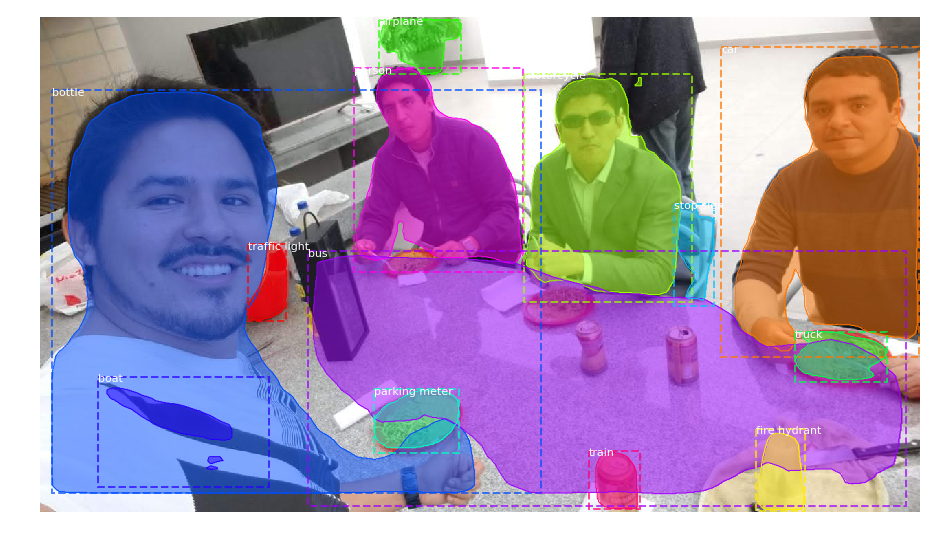

Processing 1 images
image                    shape: (780, 1040, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1040.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


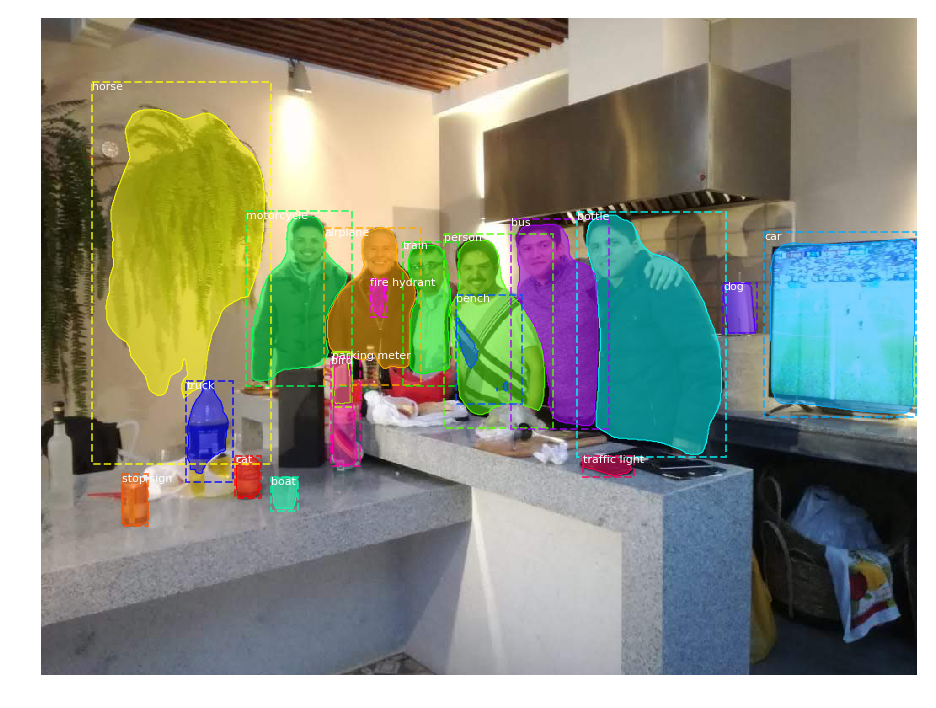

In [59]:
path_photos = 'snapshot/team*.jpg'
images = ImageCollection(path_photos)
for n,image in enumerate(images): 
    fig,ax_ = plt.subplots(1, figsize=(16,16))
    r = model.detect([image], verbose=1)[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],captions=class_names,ax=ax_)
    fig.savefig(images.files[n].replace('/','/segment_'),bbox_inches='tight')
    plt.show()